In [1]:
import navis
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_color_codes('muted')

In [6]:
# Load a single TreeNeuron
n = navis.example_neurons(n=1, kind='skeleton')
n.cable_length

266476.88

In [91]:
print((n.cable_length * n.units).to('microns'))

2131.815 micron


In [93]:
# Load a couple skeletons
nl = navis.example_neurons(kind='skeleton')
print(nl.cable_length)

[266476.88 304332.66 274703.38 286522.47 291265.3 ]


In [92]:
print(nl.n_branches)

[599 735 633 696 626]


In [3]:
df = nl.summary()
df.head()

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,1734350788,1734350788,4465,2705,599,618,266476.87500,[4177],8 nanometer
1,navis.TreeNeuron,1734350908,1734350908,4847,3042,735,761,304332.65625,[6],8 nanometer
2,navis.TreeNeuron,722817260,722817260,4332,3136,633,656,274703.37500,None,8 nanometer
3,navis.TreeNeuron,754534424,754534424,4696,3010,696,726,286522.46875,[4],8 nanometer
4,navis.TreeNeuron,754538881,754538881,4881,2943,626,642,291265.31250,[701],8 nanometer


In [12]:
# Load a single MeshNeuron
m = navis.example_neurons(n=1, kind='mesh')
print(m.volume)

1291610825.1668377

In [13]:
print(m.skeleton.cable_length)

168890.5891599271

In [58]:
n = navis.example_neurons(1, kind='skeleton')
print(n.soma)

array([4177], dtype=int32)

In [59]:
navis.reroot_skeleton(n, n.soma)

,
type,navis.TreeNeuron
name,1734350788
id,1734350788
n_nodes,4465
n_connectors,2705
n_branches,598
n_leafs,619
cable_length,266476.875
soma,[4177]
units,8 nanometer


In [67]:
sk = navis.example_neurons(n=1, kind='skeleton')
print(sk.n_nodes)

4465

In [68]:
sk_downsampled = navis.downsample_neuron(sk, downsampling_factor=10, inplace=False)
print(sk_downsampled.n_nodes)

1304

In [69]:
me = navis.example_neurons(n=1, kind='mesh')
print(me.n_faces)

13054

In [70]:
me_downsampled = navis.downsample_neuron(me, downsampling_factor=10, inplace=False)
print(me_downsampled.n_faces)

1304

In [71]:
sk = navis.example_neurons(n=1, kind='skeleton')
print(sk.sampling_resolution)

59.681270996640535

In [72]:
# Note that we can provide a unit ("1 micron") here because our neuron has units set
sk_resampled = navis.resample_skeleton(sk, resample_to='1 micron', inplace=False)
print(sk_resampled.sampling_resolution * sk_resampled.units)

1072.2341923485653 <Unit('nanometer')>

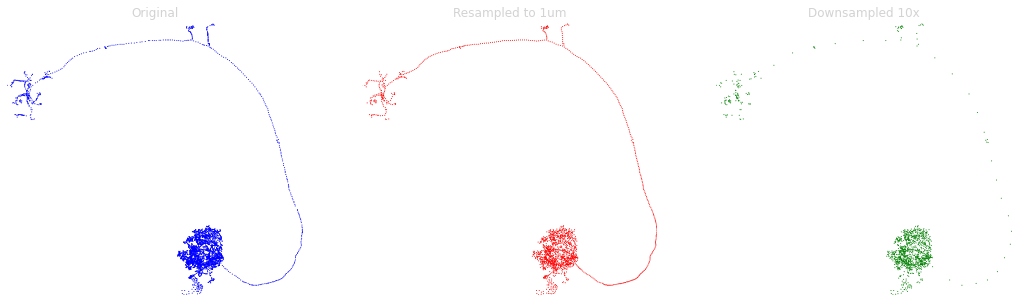

In [74]:
nodes_original = sk.nodes[['x', 'y' ,'z']].values 
nodes_downsampled = sk_downsampled.nodes[['x', 'y' ,'z']].values 
nodes_resampled = sk_resampled.nodes[['x', 'y' ,'z']].values 

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

_ = navis.plot2d(nodes_original, method='2d', view=('x', '-z'), scatter_kws=dict(c='blue'), ax=axes[0])
_ = navis.plot2d(nodes_resampled, method='2d', view=('x', '-z'), scatter_kws=dict(c='red'), ax=axes[1])
_ = navis.plot2d(nodes_downsampled, method='2d', view=('x', '-z'), scatter_kws=dict(c='green'), ax=axes[2])

for ax, title in zip(axes, ['Original', 'Resampled to 1um', 'Downsampled 10x']):
    ax.set_title(title, color='lightgrey')
    ax.set_axis_off()

plt.show()

In [81]:
# smooth_skeleton uses a rolling window along the linear segments
sk = navis.example_neurons(n=1, kind='skeleton')
sk_smoothed = navis.smooth_skeleton(sk, window=5, inplace=False)

In [76]:
# smooth_mesh uses a iterative rounds of Laplacian smoothing
me = navis.example_neurons(n=1, kind='mesh')
me_smoothed = navis.smooth_mesh(me, iterations=5, inplace=False)

In [9]:
# Load the neuron
n = nl[0]
# Pick a node ID
cut_node_id = n.nodes.node_id.values[333]
distal, proximal = navis.cut_skeleton(n, cut_node_id)

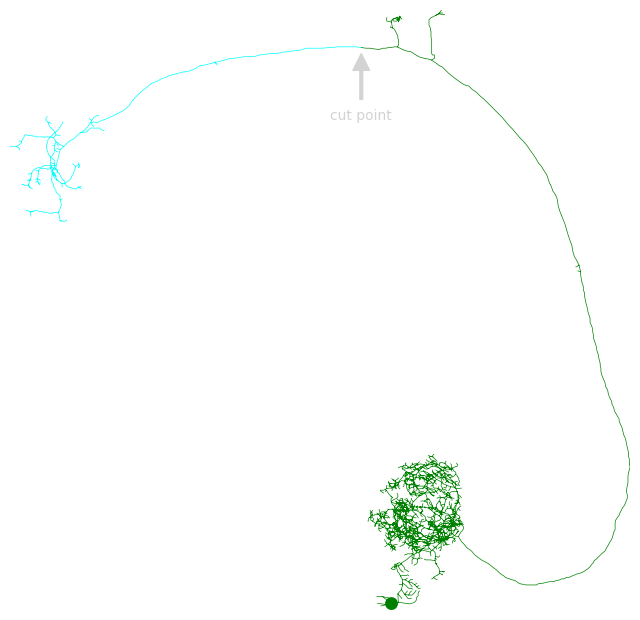

In [105]:
# Note that we are using method='2d' here because that makes annotating the plot easier
fig, ax = distal.plot2d(color='cyan', method='2d', view=('x', '-z'))
fig, ax = proximal.plot2d(color='green', ax=ax, method='2d', view=('x', '-z'))

# Annotate cut point
cut_coords = distal.nodes.set_index('node_id').loc[distal.root, ['x', 'z']].values[0]
ax.annotate('cut point',
            xy=(cut_coords[0], -cut_coords[1]),
            color='lightgrey',
            xytext=(cut_coords[0], -cut_coords[1]-2000), va='center', ha='center',
            arrowprops=dict(shrink=0.1, width=2, color='lightgrey'),
            )

plt.show()

In [28]:
node_id, dist = n.snap([14000, 16200, 12000])
print('Closest node:', node_id, 'at distance', dist)

Closest node: 334 at distance 70.71067811865476


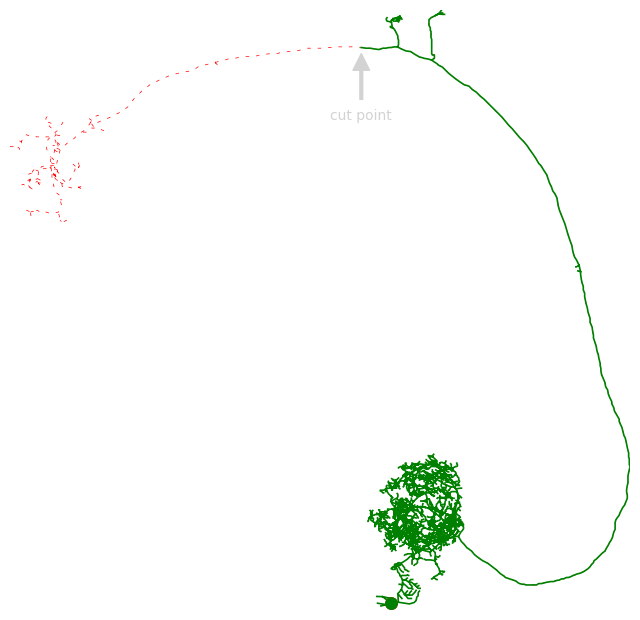

In [106]:
n_pruned = n.prune_distal_to(cut_node_id, inplace=False)

cut_coords = n.nodes.set_index('node_id').loc[cut_node_id, ['x', 'z']].values

# Plot original neuron in red and with dotted line
fig, ax = n.plot2d(color='red', method='2d', linestyle=(0, (5, 10)), view=('x', '-z'))

# Plot remaining neurites in red
fig, ax = n_pruned.plot2d(color='green', method='2d', ax=ax, view=('x', '-z'), lw=1.2)

# Annotate cut point
ax.annotate('cut point',
            xy=(cut_coords[0], -cut_coords[1]),
            color='lightgrey',
            xytext=(cut_coords[0], -cut_coords[1]-2000), va='center', ha='center',
            arrowprops=dict(shrink=0.1, width=2, color='lightgrey'),
            )

plt.show()

In [36]:
n = nl[0]
branch_points = n.nodes[n.nodes.type=='branch'].node_id.values

cut = navis.cut_skeleton(n, branch_points)
cut.head()

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,1734350788,1734350788,4,16,0,2,373.565735,None,8 nanometer
1,navis.TreeNeuron,1734350788,1734350788,5,10,0,2,431.518494,None,8 nanometer
2,navis.TreeNeuron,1734350788,1734350788,6,12,0,2,388.590637,None,8 nanometer
3,navis.TreeNeuron,1734350788,1734350788,8,22,0,2,665.534912,None,8 nanometer
4,navis.TreeNeuron,1734350788,1734350788,28,8,0,2,1534.385498,None,8 nanometer


Plot neurons:   0%|          | 0/600 [00:00<?, ?it/s]

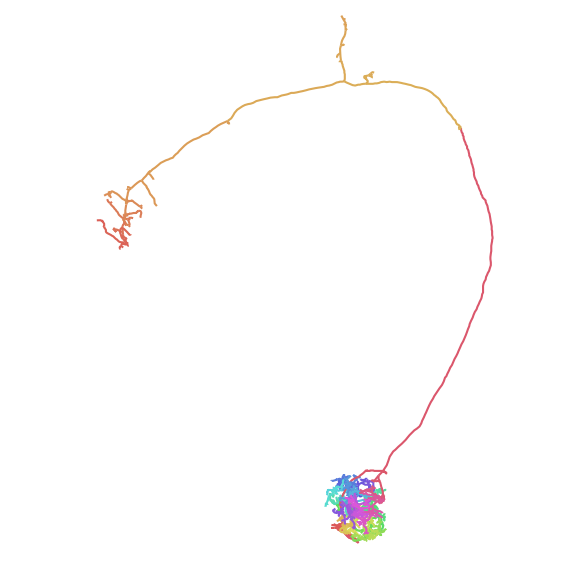

In [37]:
# Plot neuron fragments
fig, ax = navis.plot2d(cut, linewidth=1.5)

# Rotate to front view
ax.azim, ax.elev = -90, -90
ax.dist = 6

plt.show()

prune_by_strahler:   0%|          | 0/5 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/5 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/5 [00:00<?, ?it/s]

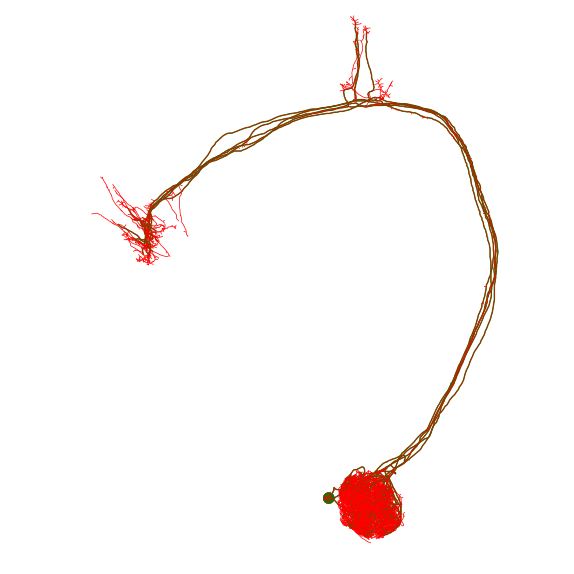

In [45]:
# This will prune off terminal branches (the lowest two Strahler indices)
nl_pruned = nl.prune_by_strahler(to_prune = [1, 2], inplace=False)

# Plot original neurons in red
fig, ax = nl.plot2d(color='red')

# Plot remaining neurites in green
fig, ax = nl_pruned.plot2d(color='green', ax=ax, linewidth=1)

# Rotate to front view
ax.azim, ax.elev = -90, -90
ax.dist = 6

plt.show()

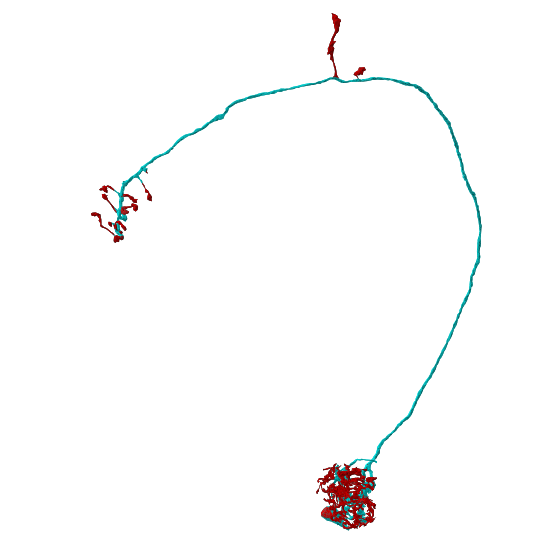

In [85]:
# Load an example mesh neuron
m = navis.example_neurons(1, kind='mesh')

# This will prune to the just terminal branches
m_pruned = navis.prune_by_strahler(m, to_prune=range(3, 100), inplace=False)

# Plot original neuron in cyan
fig, ax = m.plot2d(color='cyan', figsize=(10, 10))

# Plot remaining neurites red
fig, ax = m_pruned.plot2d(color='red', ax=ax)

# Rotate to front view
ax.azim, ax.elev = -90, -90
ax.dist = 6

plt.show()

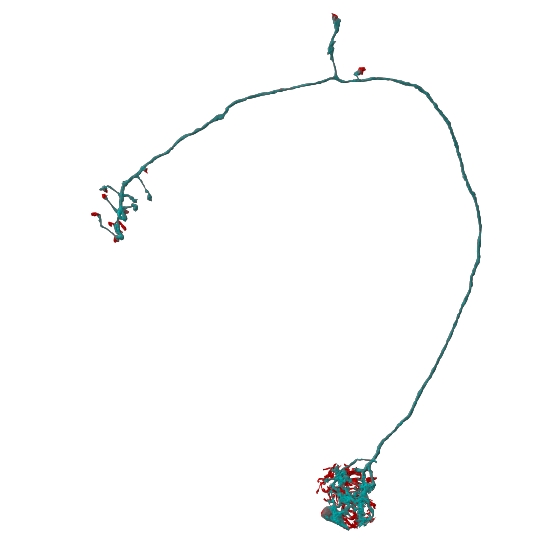

In [86]:
# This will prune all branches smaller than 10 microns
m_pruned = navis.prune_twigs(m, size='10 microns', inplace=False)

# Plot original neuron in red
fig, ax = m.plot2d(color='red', figsize=(10, 10))

# Plot remaining neurites in cyan
fig, ax = m_pruned.plot2d(color='cyan', ax=ax, linewidth=.75, alpha=.5)

# Rotate to front view
ax.azim, ax.elev = -90, -90
ax.dist = 6

plt.show()

In [55]:
# Load an example navis.Volume
lh = navis.example_volume('LH')

# Prune by volume
m_lh = navis.in_volume(m, lh, inplace=False)
m_outside_lh = navis.in_volume(m, lh, mode='OUT', inplace=False)

Plot neurons:   0%|          | 0/2 [00:00<?, ?it/s]

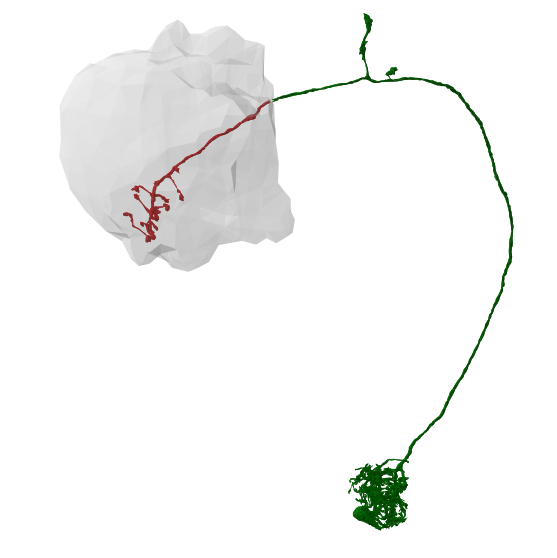

In [57]:
# Plot pruned branchs neuron in green
fig, ax = navis.plot2d([m_lh, m_outside_lh, lh], color=['red', 'green'], figsize=(10, 10))

# Rotate to front view
ax.azim, ax.elev = -90, -90
ax.dist = 6

plt.show()

In [88]:
# Get the connectors for one of our above skeletons
cn = sk.connectors

# Add a column that tells us which connectors are in the LH volume
cn['in_lh'] = navis.in_volume(cn[['x', 'y', 'z']].values, lh)
cn.head()

,connector_id,node_id,type,x,y,z,roi,confidence,in_lh
0,0,1436,pre,6444,21608,14516,LH(R),0.959,True
1,1,1436,pre,6457,21634,14474,LH(R),0.997,True
2,2,2638,pre,4728,23538,14179,LH(R),0.886,True
3,3,1441,pre,5296,22059,16048,LH(R),0.967,True
4,4,1872,pre,4838,23114,15146,LH(R),0.990,True


In [90]:
# Count the number of connectors (pre and post) in- and outside the LH:
cn.groupby(['type', 'in_lh']).size()

type  in_lh
post  False    1978
      True      106
pre   False     325
      True      296
dtype: int64

In [67]:
import numpy as np

# Get nodes but remove the root (has no parent)
nodes = nl[0].nodes[nl[0].nodes.parent_id > 0]

# Get the x/y/z coordinates of all nodes (except root)
node_locs = nodes[['x', 'y', 'z']].values

# For each node, get its parent's location
parent_locs = nl[0].nodes.set_index('node_id').loc[nodes.parent_id.values, ['x', 'y', 'z']].values

# Calculate Euclidian distances
distances = np.sqrt(np.sum((node_locs - parent_locs)**2, axis=1))

# Use the neuron's units to convert into nm 
distances = distances * n.units

print(f'Mean distance between nodes: {np.mean(distances):.2f} (+/- {np.std(distances):.2f})')

Mean distance between nodes: 477.56 nanometer (+/- 361.10 nanometer)


In [69]:
n = nl[0]

end = n.nodes[n.nodes.type == 'end'].node_id.values[0]

d_geo = navis.dist_between(n, n.soma, end) * n.units

print(f'Euclidian distance between soma and terminal node {end}: {d_geo:.2f}')

Euclidian distance between soma and terminal node 465: 444096.17 nanometer


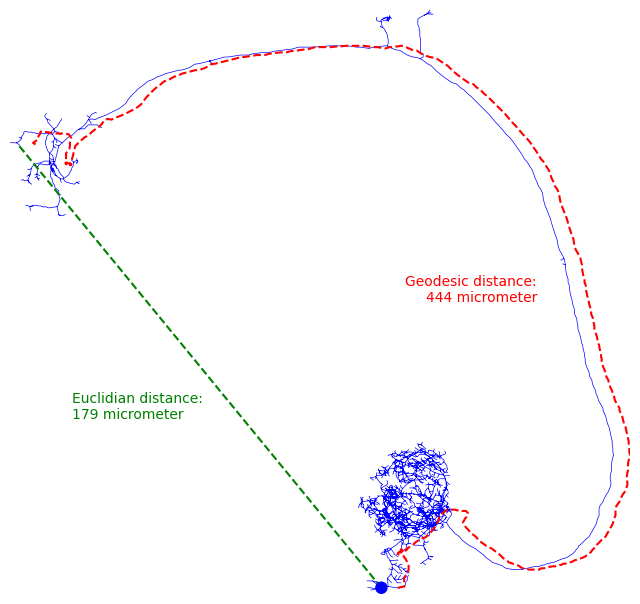

In [83]:
import networkx as nx

# First we need to find the path between the soma and the terminal node
path = nx.shortest_path(n.graph.to_undirected(), n.soma[0], end)

# Get coordinates for the path
path_co = n.nodes.set_index('node_id').loc[path, ['x', 'y', 'z']].copy()

# Add a small offset
path_co.x += 500
path_co.y -= 500

# Plot neuron
fig, ax = navis.plot2d(n, c='blue', method='2d', view=('x', '-z'))

# Add geodesic path
ax.plot(path_co.x, -path_co.z, c='r', ls='--')

# Add Euclidian path
end_loc = n.nodes.set_index('node_id').loc[end, ['x', 'y', 'z']]
soma_loc = n.nodes.set_index('node_id').loc[n.soma[0], ['x', 'y', 'z']]
ax.plot([soma_loc.x, end_loc.x], [-soma_loc.z, -end_loc.z], c='g', ls='--')

d_eucl = np.sqrt(np.sum((end_loc - soma_loc)**2)) * n.units

# Annotate distances
_ = ax.text(x=0.1, y=.3, s=f'Euclidian distance:\n{d_eucl.to_compact():.0f}', transform=ax.transAxes, c='g')
_ = ax.text(x=.85, y=.5, s=f'Geodesic distance:\n{d_geo.to_compact():.0f}', transform=ax.transAxes, c='r', ha='right')

plt.show()

In [87]:
# Calculate distances from all end nodes to all other nodes
ends = n.nodes[n.nodes.type=='end'].node_id.values
m = navis.geodesic_matrix(n, from_=ends)

# Subset to only end-nodes-to-end_nodes
m = m.loc[ends, ends]

m.head()

,465,548,618,683,745,789,832,872,911,949,...,4456,4457,4458,4459,4460,4461,4462,4463,4464,4465
465,0.000000,54395.706752,53556.405732,54489.728022,53685.768456,52679.982779,53139.882271,20944.502247,53065.272557,53873.631365,...,50402.960991,50363.976517,49936.090104,49895.070897,55185.275744,54742.764466,55158.505486,55950.521492,56111.790505,55266.165581
548,54395.706752,0.000000,8980.969668,10787.026090,6228.693973,6866.540223,8564.446208,37619.898765,8489.836493,6416.556882,...,4589.518435,5788.540454,5360.654040,5319.634833,12127.772206,11685.260928,12101.001948,12893.017955,13054.286967,12208.662044
618,53556.405732,8980.969668,0.000000,9947.725069,8271.031372,7265.245695,4698.465309,36780.597744,3951.850620,8458.894281,...,4988.223907,4060.795593,3828.188293,3866.356197,11288.471186,10845.959908,11261.700928,12053.716934,12214.985947,11369.361023
683,54489.728022,10787.026090,9947.725069,0.000000,10077.087793,9071.302116,9531.201609,37713.920034,9456.591894,10264.950703,...,6794.280329,6755.295855,6327.409441,6286.390234,12221.793476,11779.282198,12195.023218,12987.039225,13148.308237,12302.683313
745,53685.768456,6228.693973,8271.031372,10077.087793,0.000000,6156.601927,7854.507912,36909.960468,7779.898197,4485.482889,...,3879.580139,5078.602158,4650.715744,4609.696537,11417.833910,10975.322632,11391.063652,12183.079659,12344.348671,11498.723747


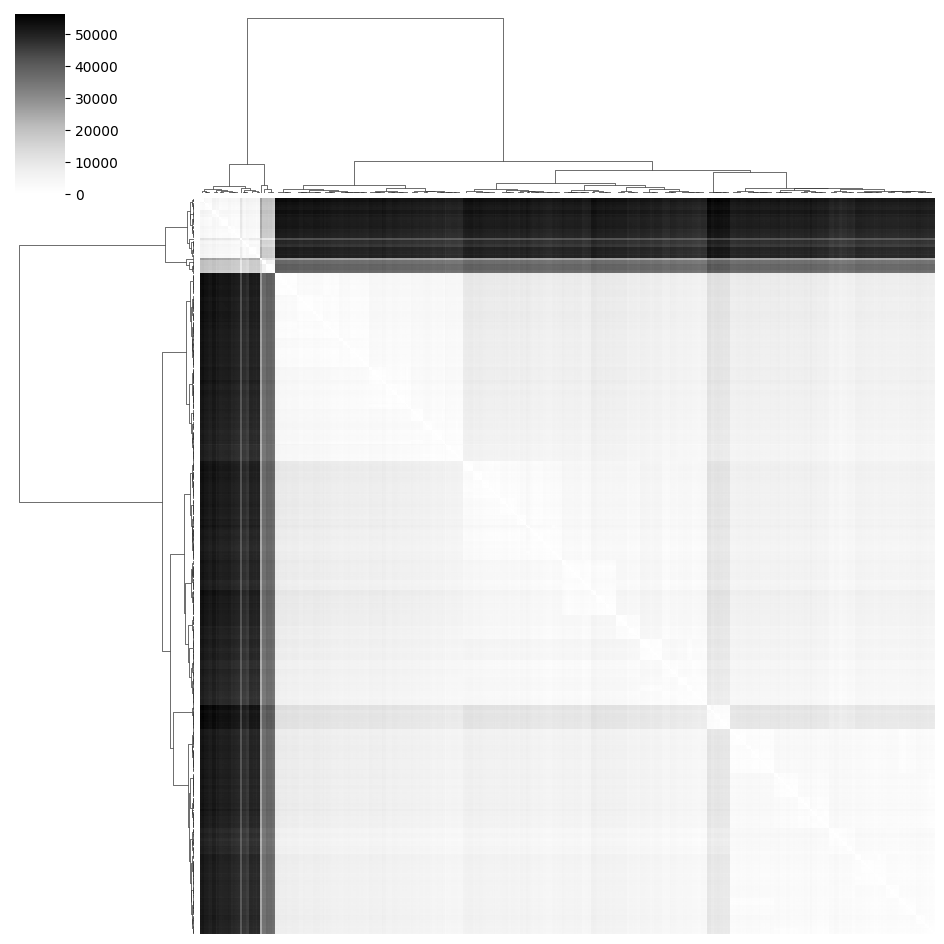

In [97]:
import seaborn as sns

from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform

# Generate a linkage from the distances
Z = linkage(squareform(m, checks=False), method='ward')

# Plot
cm = sns.clustermap(m, cmap='Greys', col_linkage=Z, row_linkage=Z)

cm.ax_heatmap.set_xticks([])
cm.ax_heatmap.set_yticks([])

plt.show()